In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

/var/folders/y_/2d6q3v617qj78nxjx8b1_2wc0000gn/T/ipykernel_40989/1579126549.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
embeddings = np.load("BindingDB/heavy_bdb_embed.npy").tolist()

In [3]:
bdb = pd.read_csv("BindingDB/HeavyBDB.csv")

In [4]:
bdb_classes = bdb["Sub_Class"].tolist()
bdb_types = set(bdb_classes)

In [5]:
bdb_class_to_indices = {x:list() for x in bdb_types}
for i, val in enumerate(bdb_classes):
    bdb_class_to_indices[val].append(i)

In [6]:
zembeddings = scipy.stats.zscore(embeddings)

In [7]:
nooutlier_embeddings = [embeddings[i] for i in range(len(embeddings)) if i != 29123]

In [8]:
nooutlier_zembeddings = scipy.stats.zscore(nooutlier_embeddings)

In [9]:
# Nature-style rcParams
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'font.size': 8,
    'axes.linewidth': 0.5,
    'axes.labelsize': 9,
    'axes.titlesize': 9,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 3,
    'ytick.major.size': 3,
    'xtick.minor.size': 1.5,
    'ytick.minor.size': 1.5,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.spines.top': False,
    'axes.spines.right': False,
})

In [10]:
classes_of_interest = ["ACC2", "USP30", "Bile acid receptor", "Glucose-dependent insulinotropic receptor", "NAMPT", "Diacylglycerol O-acyltransferase"]
altnames = {"Bile acid receptor": "GPBAR1", "Glucose-dependent insulinotropic receptor": "GIPR", "Diacylglycerol O-acyltransferase": "DGAT"}

In [11]:
pca = PCA(n_components=2)
pca.fit(embeddings)
pca_raw = pca.transform(embeddings)

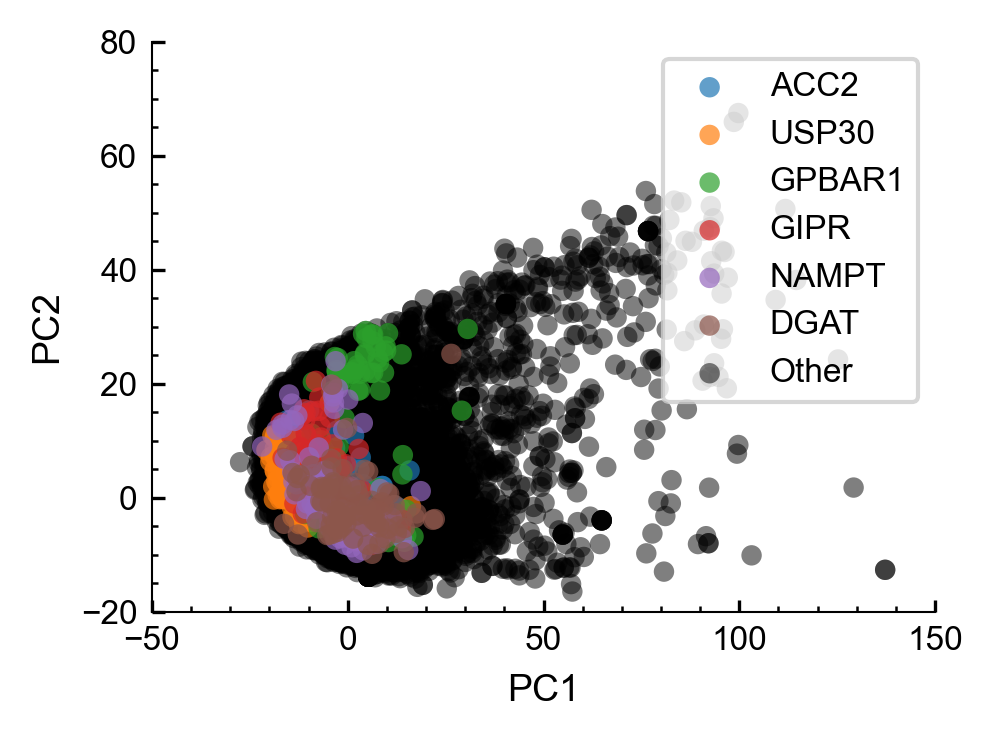

In [12]:
# Set figure size to single column width (inches)
fig, ax = plt.subplots(figsize=(3.35, 2.5))

for subclass in classes_of_interest:
    ax.scatter([pca_raw[i][0] for i in range(len(pca_raw)) if i in bdb_class_to_indices[subclass]],
           [pca_raw[i][1] for i in range(len(pca_raw)) if i in bdb_class_to_indices[subclass]],
           s=24, alpha=0.7,edgecolors='none', zorder=3, label=altnames[subclass] if subclass in altnames else subclass)
ax.scatter([pca_raw[i][0] for i in range(len(pca_raw))],
           [pca_raw[i][1] for i in range(len(pca_raw))],
           s=24, c="black", alpha=0.5,edgecolors='none', zorder=2, label="Other")


# Axis labels
ax.set_xlabel("PC1", labelpad=4)
ax.set_ylabel("PC2", labelpad=4)

# Minor ticks
ax.minorticks_on()

# Remove top/right spines (redundant with rcParams, but explicit here)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim((-50, 150))
ax.set_ylim((-20, 80))
ax.legend()

plt.tight_layout()
plt.show()

In [13]:
# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE to reduce dimensionality
pca_raw = tsne.fit_transform(np.array(embeddings))

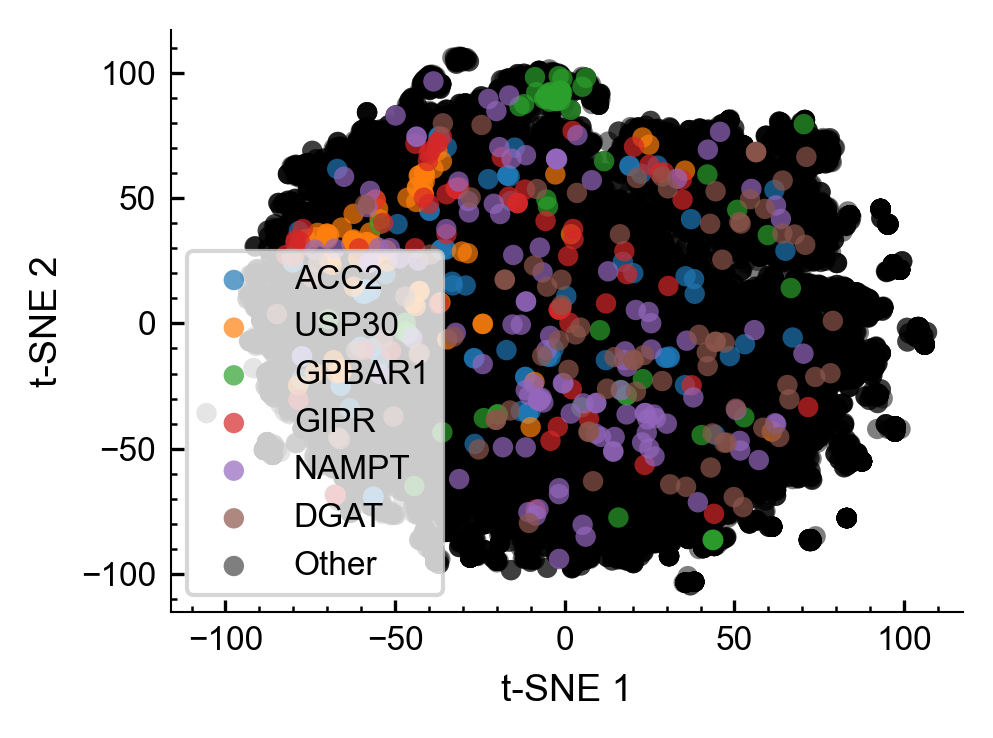

In [14]:
# Set figure size to single column width (inches)
fig, ax = plt.subplots(figsize=(3.35, 2.5))

for subclass in classes_of_interest:
    ax.scatter([pca_raw[i][0] for i in range(len(pca_raw)) if i in bdb_class_to_indices[subclass]],
           [pca_raw[i][1] for i in range(len(pca_raw)) if i in bdb_class_to_indices[subclass]],
           s=24, alpha=0.7,edgecolors='none', zorder=3, label=altnames[subclass] if subclass in altnames else subclass)
ax.scatter([pca_raw[i][0] for i in range(len(pca_raw))],
           [pca_raw[i][1] for i in range(len(pca_raw))],
           s=24, c="black", alpha=0.5,edgecolors='none', zorder=2, label="Other")

# Axis labels
ax.set_xlabel("t-SNE 1", labelpad=4)
ax.set_ylabel("t-SNE 2", labelpad=4)

# Minor ticks
ax.minorticks_on()

# Remove top/right spines (redundant with rcParams, but explicit here)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.set_xlim((-50, 150))
#ax.set_ylim((-20, 80))
ax.legend()

plt.tight_layout()
plt.show()

In [15]:
pca.explained_variance_ratio_

array([0.35597713, 0.12866934])

In [16]:
import umap.umap_ as umap

In [17]:
umap_2d = umap.UMAP(n_components=2, random_state=1)
pca_raw = umap_2d.fit_transform(embeddings)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


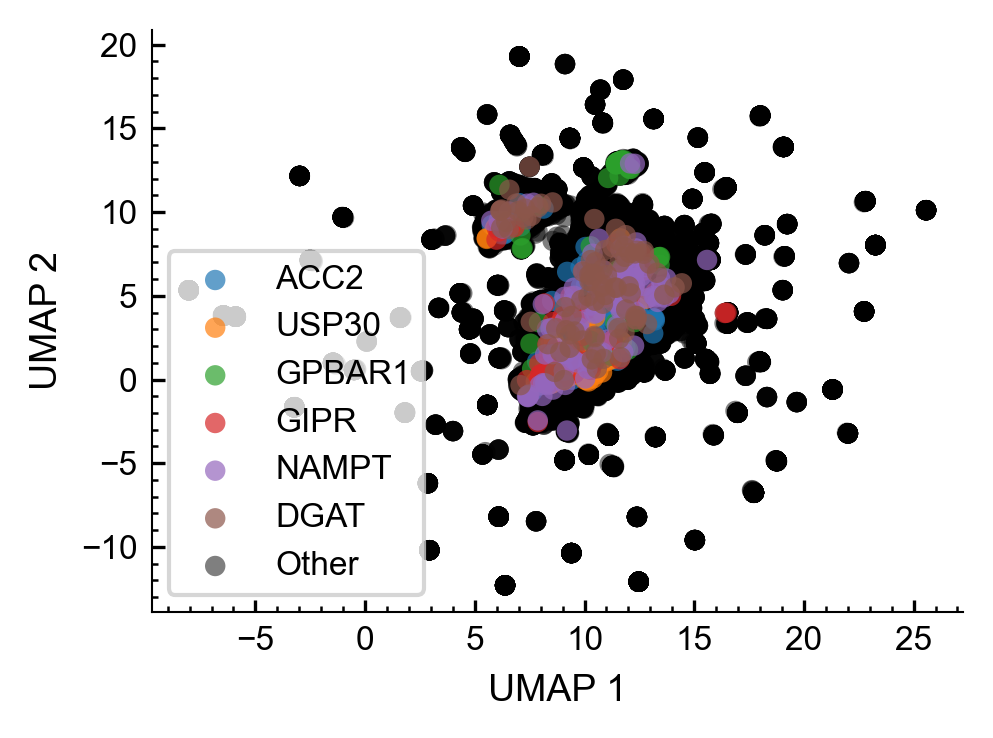

In [18]:
# Set figure size to single column width (inches)
fig, ax = plt.subplots(figsize=(3.35, 2.5))

for subclass in classes_of_interest:
    ax.scatter([pca_raw[i][0] for i in range(len(pca_raw)) if i in bdb_class_to_indices[subclass]],
           [pca_raw[i][1] for i in range(len(pca_raw)) if i in bdb_class_to_indices[subclass]],
           s=24, alpha=0.7,edgecolors='none', zorder=3, label=altnames[subclass] if subclass in altnames else subclass)
ax.scatter([pca_raw[i][0] for i in range(len(pca_raw))],
           [pca_raw[i][1] for i in range(len(pca_raw))],
           s=24, c="black", alpha=0.5,edgecolors='none', zorder=2, label="Other")

# Axis labels
ax.set_xlabel("UMAP 1", labelpad=4)
ax.set_ylabel("UMAP 2", labelpad=4)

# Minor ticks
ax.minorticks_on()

# Remove top/right spines (redundant with rcParams, but explicit here)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.set_xlim((-50, 150))
#ax.set_ylim((-20, 80))
ax.legend()

plt.tight_layout()
plt.show()